In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline
from game import game, random_connection_game

In [2]:
import time
from IPython.display import clear_output

In [3]:
Memb = 400
newg = random_connection_game(9,  Memb)

In [4]:
newg.print_original()

0.05 -0.08 -0.04 -0.06 0.00 0.13 -0.14 0.00 0.10 
-0.08 -0.11 -0.06 0.08 0.05 0.05 0.07 -0.07 0.00 
-0.04 -0.06 0.13 0.03 0.06 0.12 -0.08 -0.10 -0.05 
-0.06 0.08 0.03 0.04 -0.02 -0.16 0.00 0.00 0.00 
0.00 0.05 0.06 -0.02 -0.09 0.00 -0.04 0.07 -0.08 
0.13 0.05 0.12 -0.16 0.00 -0.08 -0.05 0.00 0.04 
-0.14 0.07 -0.08 0.00 -0.04 -0.05 -0.09 0.06 -0.12 
0.00 -0.07 -0.10 0.00 0.07 0.00 0.06 0.31 0.15 
0.10 0.00 -0.05 0.00 -0.08 0.04 -0.12 0.15 0.00 


In [5]:
newg.print_original()

0.05 -0.08 -0.04 -0.06 0.00 0.13 -0.14 0.00 0.10 
-0.08 -0.11 -0.06 0.08 0.05 0.05 0.07 -0.07 0.00 
-0.04 -0.06 0.13 0.03 0.06 0.12 -0.08 -0.10 -0.05 
-0.06 0.08 0.03 0.04 -0.02 -0.16 0.00 0.00 0.00 
0.00 0.05 0.06 -0.02 -0.09 0.00 -0.04 0.07 -0.08 
0.13 0.05 0.12 -0.16 0.00 -0.08 -0.05 0.00 0.04 
-0.14 0.07 -0.08 0.00 -0.04 -0.05 -0.09 0.06 -0.12 
0.00 -0.07 -0.10 0.00 0.07 0.00 0.06 0.31 0.15 
0.10 0.00 -0.05 0.00 -0.08 0.04 -0.12 0.15 0.00 


In [6]:
newg.state.shape

(2, 400, 400)

In [7]:
def randomAgent(state, Memb = 25):
    move = random.randint(3)
    spin_1 = random.randint(Memb)
    spin_2 = random.randint(4)
    return (move, spin_1, spin_2)

In [8]:
from model.dqn_agent import Agent

In [9]:
from model.model import QNetwork_Conv

In [31]:
# Reset!
Memb = 4*4
statesize = Memb*Memb*1+9*9
actionsize = 3*Memb*4
randomAgent0 = lambda state: randomAgent(state, Memb)
#env = game(Hint, Memb = Memb)
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [32, 64, 128, 128, 64], model = QNetwork_Conv)

In [32]:
env = random_connection_game(9,  Memb)


In [33]:
env.state.shape

(2, 16, 16)

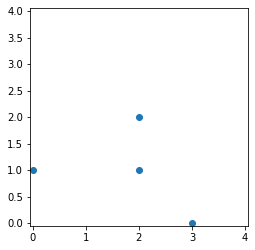

-3.8 4 (0, 11, 0) 10


In [36]:
env = random_connection_game(4,  Memb)

#
state = env.state
fig, ax = env.plot()
score = 0.0
actions = []
for j in range(2000):
    clear_output(wait=True)

    action = smartagent0.act(state, eps = 1.0)
    state, reward, done =env.step(action)
    score += reward
    actions.append((*action, reward))

    fig, ax = env.plot()
    plt.show()
    print(score, env.N, action, env.terms_left)
    if done >0:
        break

In [24]:
from collections import namedtuple, deque

def dqn(agent, n_episodes=2000, max_t=2000, 
        eps_start=1.0, eps_end=0.01, eps_decay=0.9995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            action_tr = action[0]+action[1]*3+action[2]*3*Memb
            agent.step(state, action_tr, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score, eps: {:.2f}, {:.2f}'.format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_online.state_dict(), 'checkpoint.pth')
            break
    return scores

In [25]:
np.random.choice(10)

4

In [26]:
np.expand_dims(state,0).shape

(1, 2, 64, 64)

In [27]:
np.vstack((np.expand_dims(state,0),np.expand_dims(state,0))).shape

(2, 2, 64, 64)

In [28]:
scores = dqn(smartagent0)

Episode 100	Average Score, eps: -3.97, 0.95
Episode 200	Average Score, eps: -3.97, 0.90
Episode 300	Average Score, eps: -3.99, 0.86
Episode 400	Average Score, eps: -3.90, 0.82
Episode 500	Average Score, eps: -3.93, 0.78
Episode 600	Average Score, eps: -3.95, 0.74
Episode 700	Average Score, eps: -3.87, 0.70
Episode 800	Average Score, eps: -3.92, 0.67
Episode 848	Average Score: -3.91

KeyboardInterrupt: 

In [ ]:
plt.plot(scores)

In [ ]:
state = env.reset()
score = 0
for t in range(1):
    action = smartagent0.act(state, 0.1)
    next_state, reward, done = env.step(action)
    action_tr = action[0]+action[1]*3+action[2]*3*Memb
    smartagent0.step(state, action_tr, reward, next_state, done)
    state = next_state
    score += reward


In [ ]:
smartagent0.memory.sample()[0].cpu().numpy().shape